In [1]:
library("dplyr")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library("RSQLite")

In [3]:
library("sqldf")

Loading required package: gsubfn
Loading required package: proto
Could not load tcltk.  Will use slower R code instead.


In [4]:
data <- read.csv("File1.csv")

Importing the csv file into the attribute "data"

In [5]:
data

ï..psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,...,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,...,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,...,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,...,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,...,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,...,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,...,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737
100049,1,61015,1,R,1,42,1,1,1,...,1,2,NA,1,99,NA,NA,15748,1.387097,0.4428635
100051,1,61915,1,R,2,26,1,1,1,...,2,2,NA,1,7,NA,NA,49690,1.645161,0.5252567
100058,1,61015,1,R,3,40,2,1,2,...,5,2,NA,1,6,NA,NA,73655,1.000000,0.3192737
100059,1,61015,1,U,1,23,1,1,3,...,4,2,NA,1,3,NA,NA,4412,2.935484,0.9372228


data is a data frame that is composed of the contents of the csv file imported

In [6]:
str(data)

'data.frame':	2001 obs. of  140 variables:
 $ ï..psraid : int  100006 100009 100011 100039 100040 100043 100049 100051 100058 100059 ...
 $ sample    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ int_date  : int  61015 61015 61015 61015 61015 62215 61015 61915 61015 61015 ...
 $ lang      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ usr       : Factor w/ 3 levels "R","S","U": 2 3 2 2 3 1 1 1 1 3 ...
 $ cregion   : int  3 3 2 3 3 2 1 2 3 1 ...
 $ state     : int  51 24 39 37 21 20 42 26 40 23 ...
 $ form      : int  1 2 2 2 1 1 1 1 2 1 ...
 $ sex       : int  2 2 2 2 2 2 1 1 1 1 ...
 $ q1        : int  1 2 1 1 1 1 1 1 2 3 ...
 $ q3        : int  2 3 2 2 2 2 4 2 2 4 ...
 $ eminuse   : int  1 1 2 1 1 1 2 2 1 2 ...
 $ intmob    : int  1 1 2 1 2 1 2 2 1 2 ...
 $ intfreq   : int  1 5 NA 2 3 4 NA NA 3 NA ...
 $ home4nw   : int  1 1 NA 1 1 1 NA NA 1 NA ...
 $ bbhome1   : int  2 1 NA 2 2 2 NA NA 2 NA ...
 $ bbhome2   : int  NA 1 NA NA NA NA NA NA NA NA ...
 $ bbhome3a  : int  3 3 3 3 3 1 3 2 3 2 ...
 $ bbhome3b  : in

Query1: How many users that have smart phones and used smart phones for job search in any way say that it is important when it comes to looking for job and career resources?

Here, the attribute SMART1 tells us how many users use smartphones, SMJOB1 attribute categorizes whether the user has ever used smart phone for job search in any way and SMJOB3 attribute tells about the opinion of each user on the importance of smrt phone for job search and resources.

In [7]:
data <- within( data, smart1 <- factor(smart1, labels=c("Yes","No","Don't Know","Refused")))
data <- within( data, smjob1 <- factor(smjob1, labels = c("Yes","No","Don't Know","Refused")))
data <- within( data, smjob3 <- factor(smjob3, labels = c("Very Important","Somewhat Important","Not too important","Not at all important","Don't Know","Refused")))

ERROR: Error in factor(smjob1, labels = c("Yes", "No", "Don't Know", "Refused")): invalid 'labels'; length 4 should be 1 or 2


Factoring the data frame columns using specific labels with their meanings.
For SMJOB1, "Don't Know" and "Refused" values, represented by 8 and 9, are not present in the survey at all although they were an option to select for each user. Hence, we do not need to label these values.

In [8]:
data <- within( data, smart1 <- factor(smart1, labels=c("Yes","No","Don't Know","Refused")))
data <- within( data, smjob1 <- factor(smjob1, labels = c("Yes","No")))
data <- within( data, smjob3 <- factor(smjob3, labels = c("Very Important","Somewhat Important","Not too important","Not at all important","Don't Know","Refused")))

In [9]:
library("ggplot2")

ggplot2 library is required to plot the data using either jitter plots or histogram or various other inbuilt plot designs.

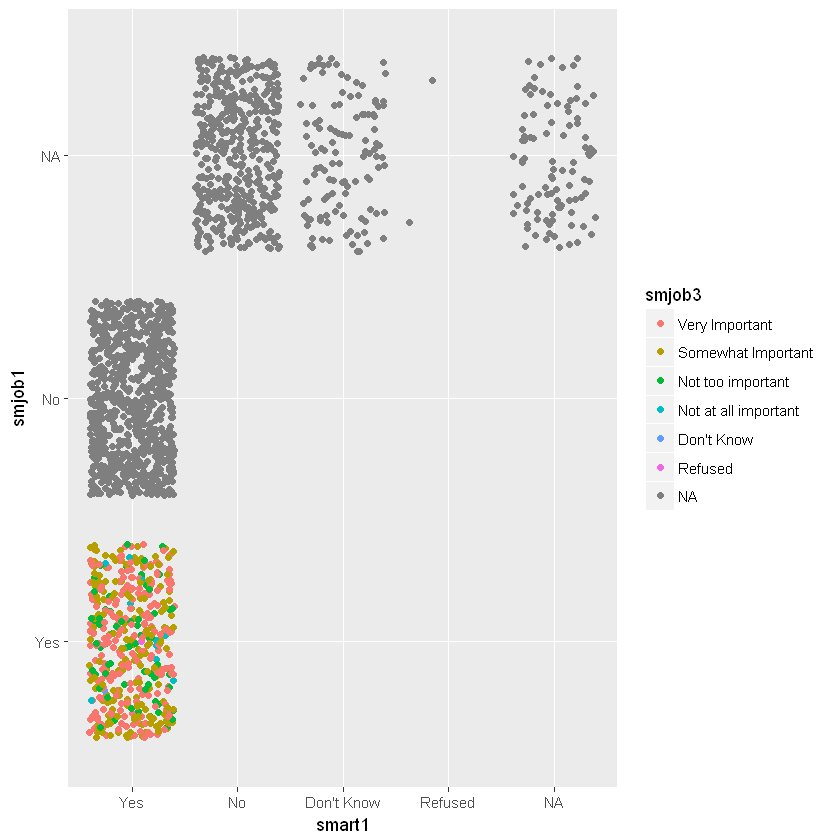

In [10]:
qplot(smart1,smjob1,colour=smjob3,data=data,geom="jitter")

From the jitterplot above, we can see that a lot of null values are getting plotted.

In [11]:
data <- data[data$smart1!="No" & data$smart1!="Don't Know" & data$smart1!="Refused", ]

In [12]:
data <- data[data$smjob1!="No",]

We need just the rows that contain smart phone users. Hence, we are removing the rows that contain any other values other than "Yes" for SMART1 and SMJOB1.

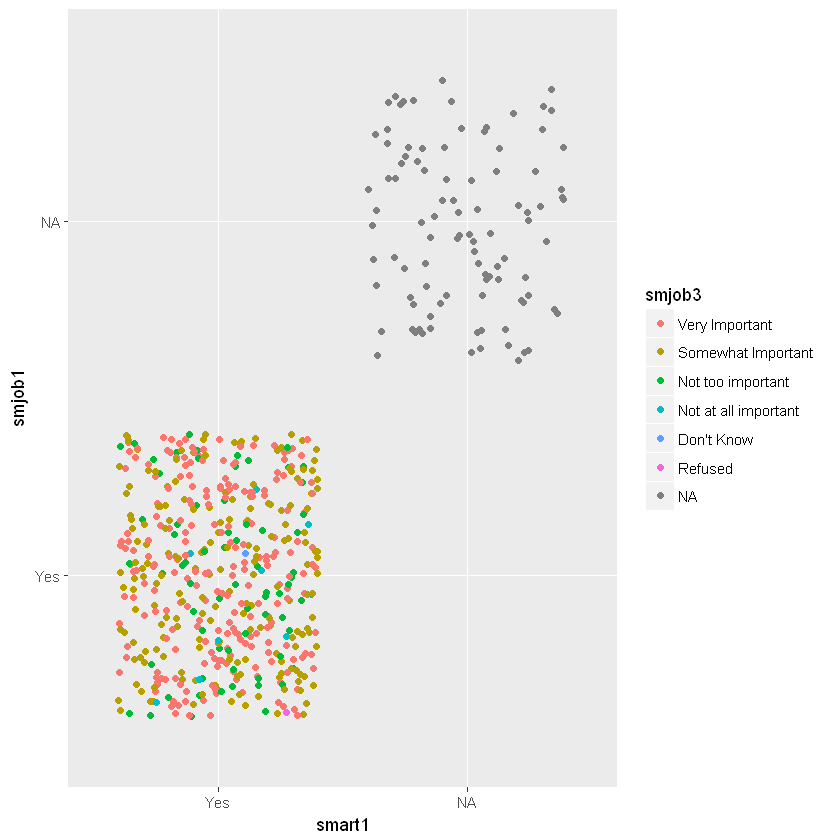

In [13]:
qplot(smart1,smjob1,colour=smjob3,data=data,geom="jitter")

It can be seen that null values are still present in the data and are getting plotted hence.

In [14]:
nd <- na.omit(data,cols="smart1")
nd <- na.omit(data,cols="smjob1")

The above statement removes all the rows in the dataframe as almost every row has a null value in atleast one column.

In [15]:
n1 <- data[!(is.na(data$smart1) | data$smart1==""), ]
n1 <- data[!(is.na(data$smjob1) | data$smjob1==""), ]

The above statement removes the rows with null values in SMART1 and SMJOB1 attributes.

In [16]:
nd

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

ï..psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,...,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt


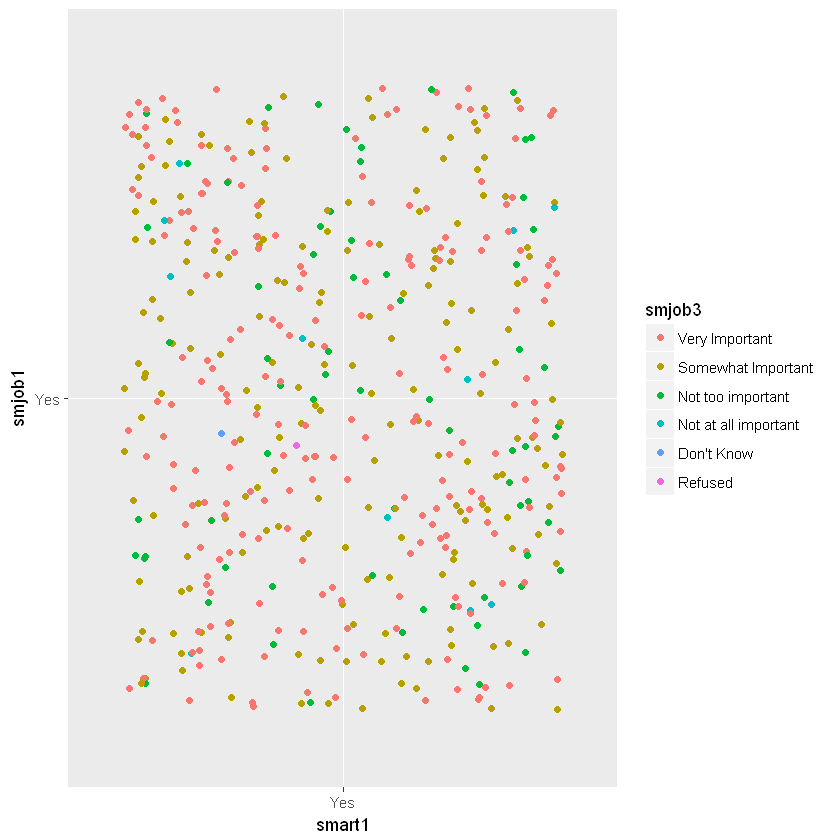

In [17]:
qplot(smart1,smjob1,colour=smjob3,data=n1,geom="jitter")

A jitterplot that shows smart phone user's opinion on whether it is important for job search is plotted above.

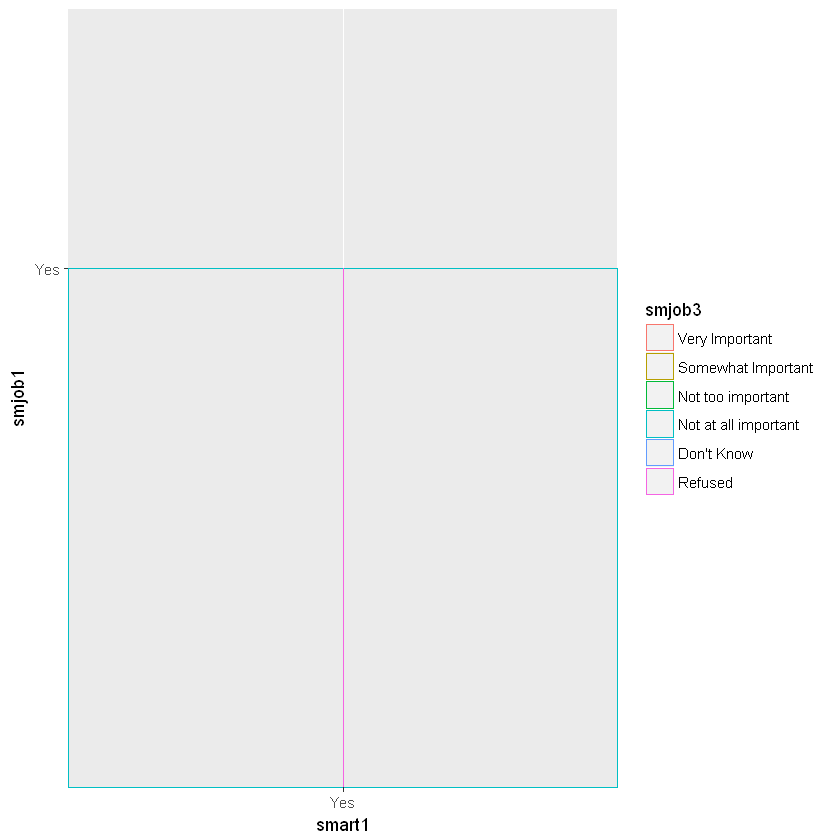

In [18]:
qplot(smart1,smjob1,colour=smjob3,data=n1,geom="density")

Tried to plot the same graph using grom_density but it did not turn out so well with 3 attributes.

In [19]:
data <- within(data, date3a <- factor(date3a,labels = c("Yes","No","Don't Know","Refused")))

ERROR: Error in factor(date3a, labels = c("Yes", "No", "Don't Know", "Refused")): invalid 'labels'; length 4 should be 1 or 3


Query 2: How will a user's opinion on whether online dating is a good way to meet people or not change based on his/her experience of knowing anyone using a dating app or of anyone married to someone found through a dating app?

In [20]:
data <- within(data, date3a <- factor(date3a,labels = c("Yes","No","Don't Know")))
data <- within(data, date3b <- factor(date3b, labels = c("Yes","No","Don't Know","Refused")))

In [21]:
data <- within(data, date4a <- factor(date4a, labels = c("Agree","Disagree","Don't Know","Refused")))

We are using date3a, date3b and date4a to make the analysis.

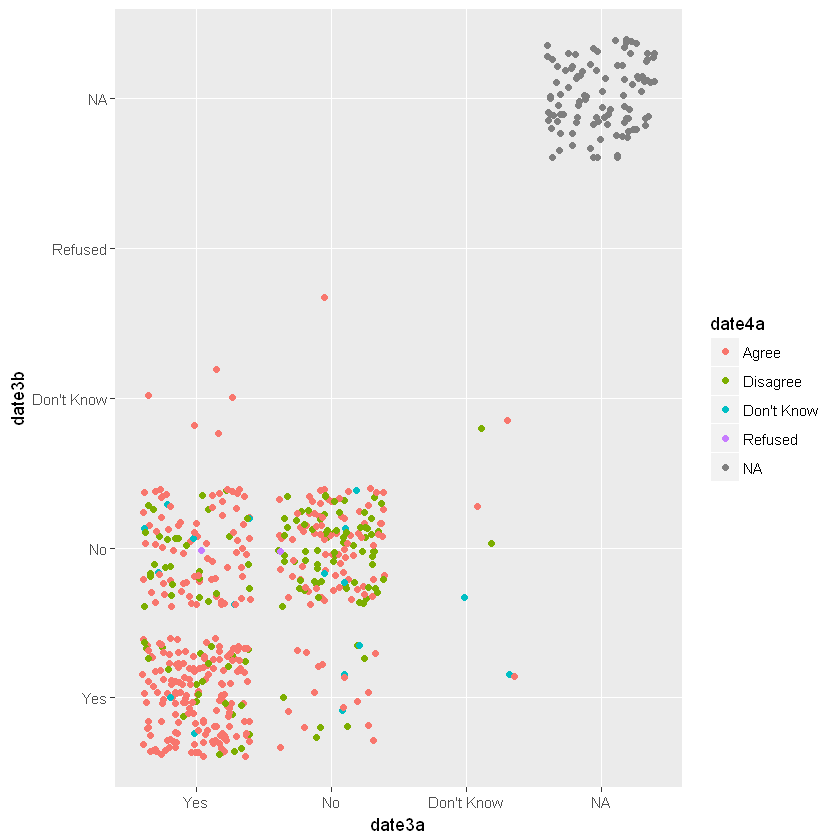

In [22]:
qplot(date3a,date3b,colour=date4a,data=data,geom="jitter")

There are some null values existing in the data extracted.

In [23]:
n2 <- data[!(is.na(data$date3a) | data$date3a==""), ]
n2 <- data[!(is.na(data$date3b) | data$date3b==""), ]

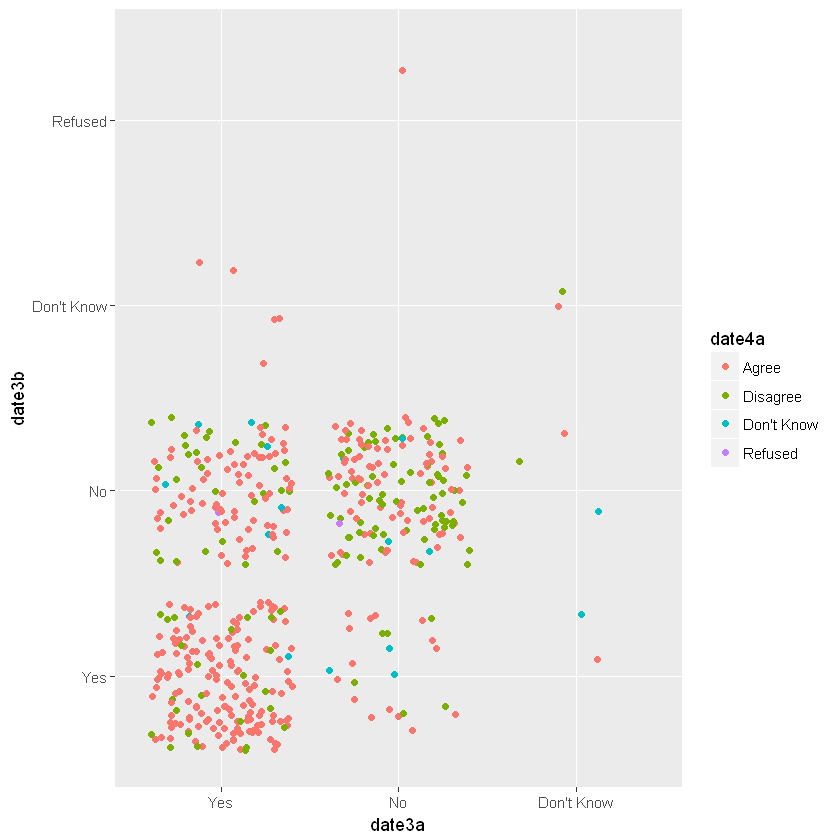

In [24]:
qplot(date3a,date3b,colour=date4a,data=n2,geom="jitter")

Jitter plot obtained after removing the null values in the columns.

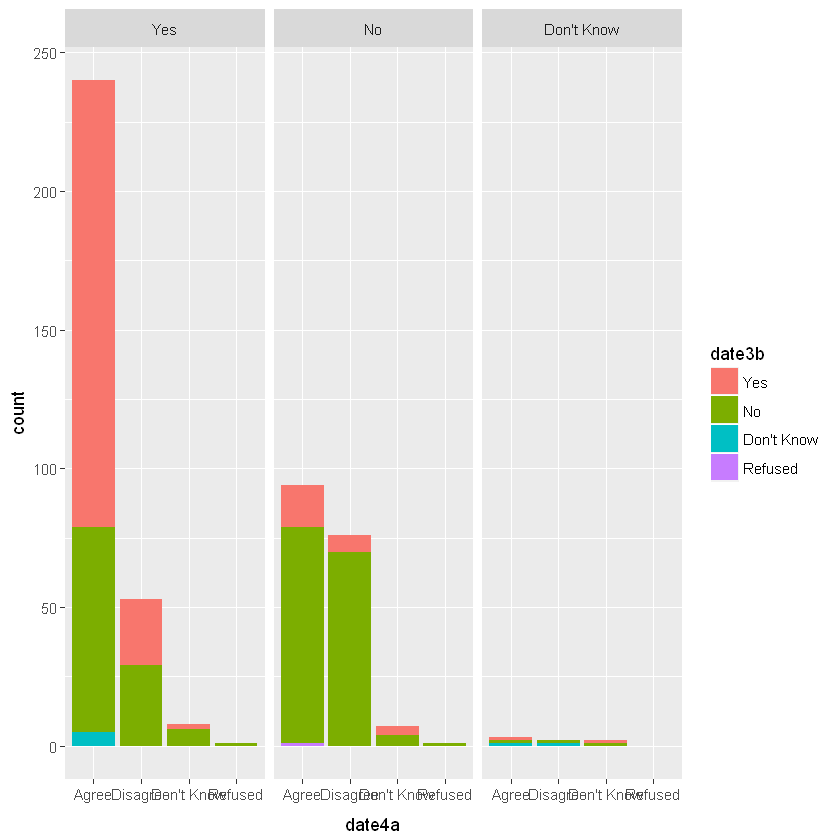

In [25]:
qplot(date4a, data=n2, geom="bar", facets = . ~ date3a, fill=date3b)

Bar Graph obtained using the same variables is plotted as above.

Query 3: How do the users who are employed and play games categorise their opnion on whether video games promote teamwork and communication?

In [26]:
data <- within(data, emplnw <- factor(emplnw, labels = c("Employed full-time","Employed part-time","Retired","Not employed for pay",)))

ERROR: Error in c("Employed full-time", "Employed part-time", "Retired", "Not employed for pay", : argument 5 is empty


In [27]:
data <- data[data$emplnw!="5" & data$emplnw!="6" & data$emplnw!="7" & data$emplnw!="8" & data$emplnw!="98" & data$emplnw!="99", ]

Considering only relevant values for empln attribute such as "Employed full-time", "Employed part time", "Retired" and "Not employed for pay".

In [28]:
data <- within(data, emplnw <- factor(emplnw, labels = c("Employed full-time","Employed part-time","Retired","Not employed for pay")))

In [29]:
data <- data[data$game1!="8" & data$game1!="9",]

Removing irrelevant and, mostly, null values.

In [30]:
data <- within(data, game1 <- factor(game1, labels = c("Yes","No")))

In [31]:
data <- within(data, game2d <- factor(game2d, labels = c("True for MOST games","True for some but not others","NOT true for most games","Not sure","Refused")))

In [32]:
n3 <- data[!(is.na(data$game1) | data$game1==""), ]
n3 <- data[!(is.na(data$emplnw) | data$emplnw==""), ]

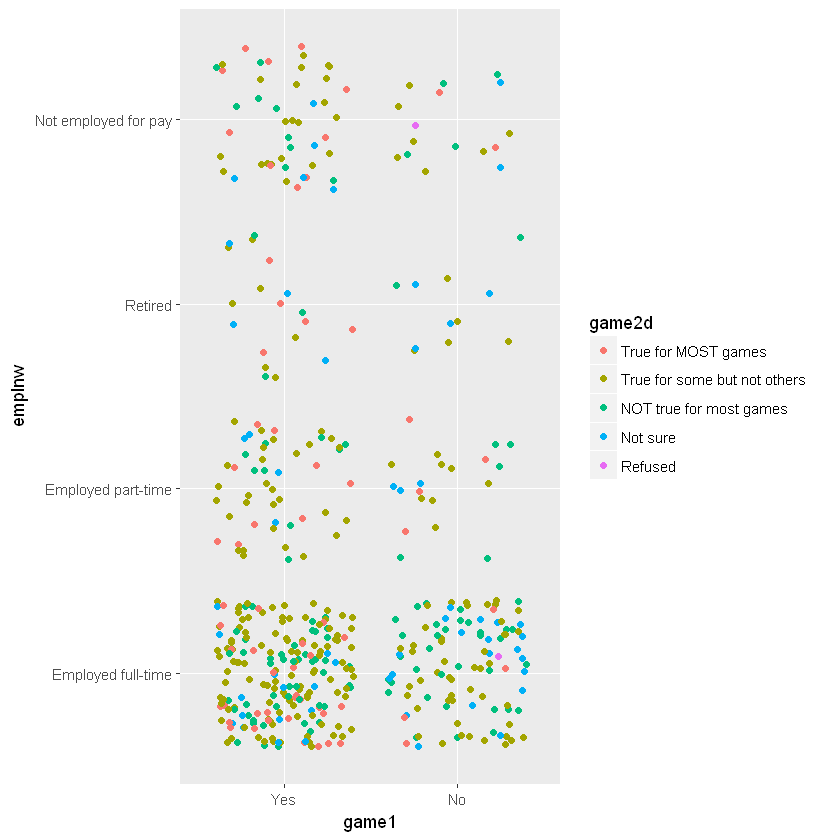

In [33]:
qplot(game1, emplnw, colour=game2d, data=n3, geom="jitter")

The above jitter plot shows how different users who play games and their employment type and their view on whether video games promote team work and communication.

In [34]:
ggplot(n3,aes(game1,fill=game2d) + geom_histogram())

ERROR: Error in aes(game1, fill = game2d) + geom_histogram(): non-numeric argument to binary operator


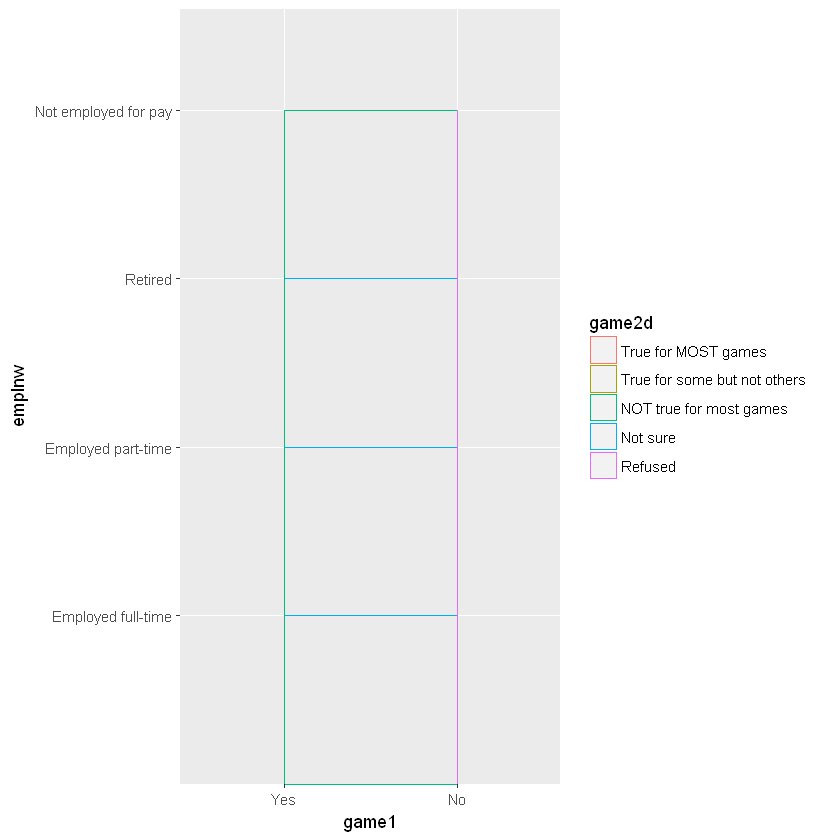

In [35]:
ggplot(n3,aes(game1,emplnw,colour=game2d))+geom_density()

Tried plotting with geom_density graph but it did not work out as expected.

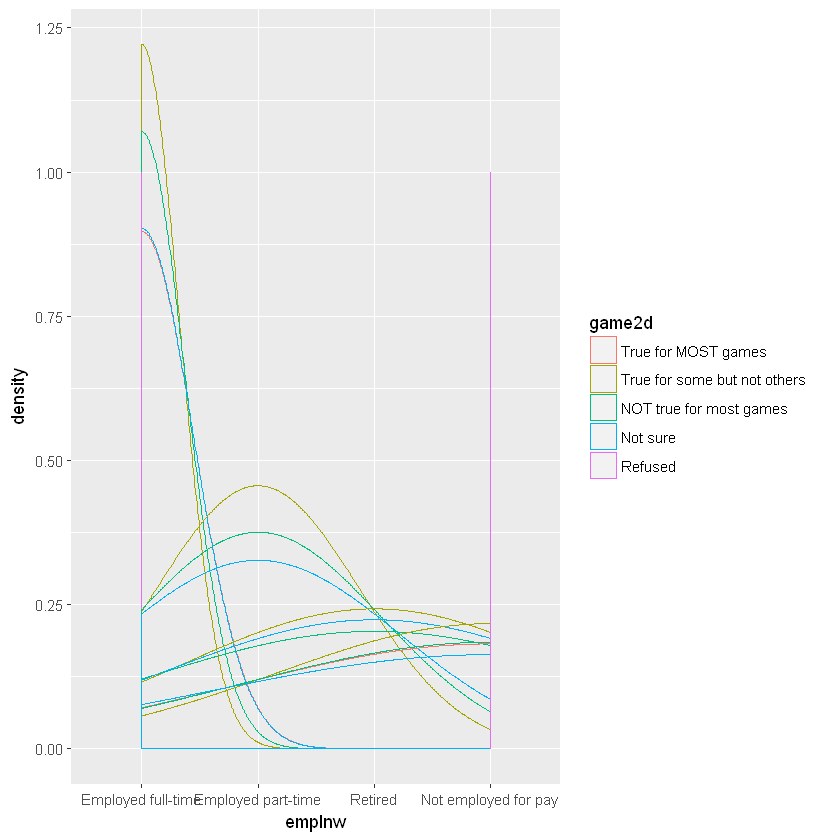

In [36]:
ggplot(n3,aes(emplnw,colour=game2d))+geom_density()

geom_density() graph seems to work better with 2 variables.

Query 4: How can we group the reasons why a user does not have smartphone?

In [37]:
data1 <- read.csv("File1.csv")
data1

ï..psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,...,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,...,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,...,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,...,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,...,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,...,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,...,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737
100049,1,61015,1,R,1,42,1,1,1,...,1,2,NA,1,99,NA,NA,15748,1.387097,0.4428635
100051,1,61915,1,R,2,26,1,1,1,...,2,2,NA,1,7,NA,NA,49690,1.645161,0.5252567
100058,1,61015,1,R,3,40,2,1,2,...,5,2,NA,1,6,NA,NA,73655,1.000000,0.3192737
100059,1,61015,1,U,1,23,1,1,3,...,4,2,NA,1,3,NA,NA,4412,2.935484,0.9372228


In [38]:
data1 <- within(data1, smart1 <- factor(smart1, labels = c("Yes","No","Don't Know","Refused")))

In [39]:
data1 <- data1[data1$smart1!="Yes" & data1$smart1!="Refused", ]

In [40]:
data1 <- data1[data1$q4!="6" & data1$q4!="12" & data1$q4!="11" & data1$q4!="13" & data1$q4!="14" & data1$q4!="97" & data1$q4!="98" & data1$q4!="99",]

In [41]:
data1 <- within(data1, q4 <- factor(q4, labels = c("Don't need one","Too expensive","Too complicated","Just not interested","Phone is too expensive","Happy with current phone","Only use phone for calling/texting","Plan to get one","No reason")))

In [42]:
n4 <- data1[!(is.na(data1$smart1) | data1$smart1==""), ]

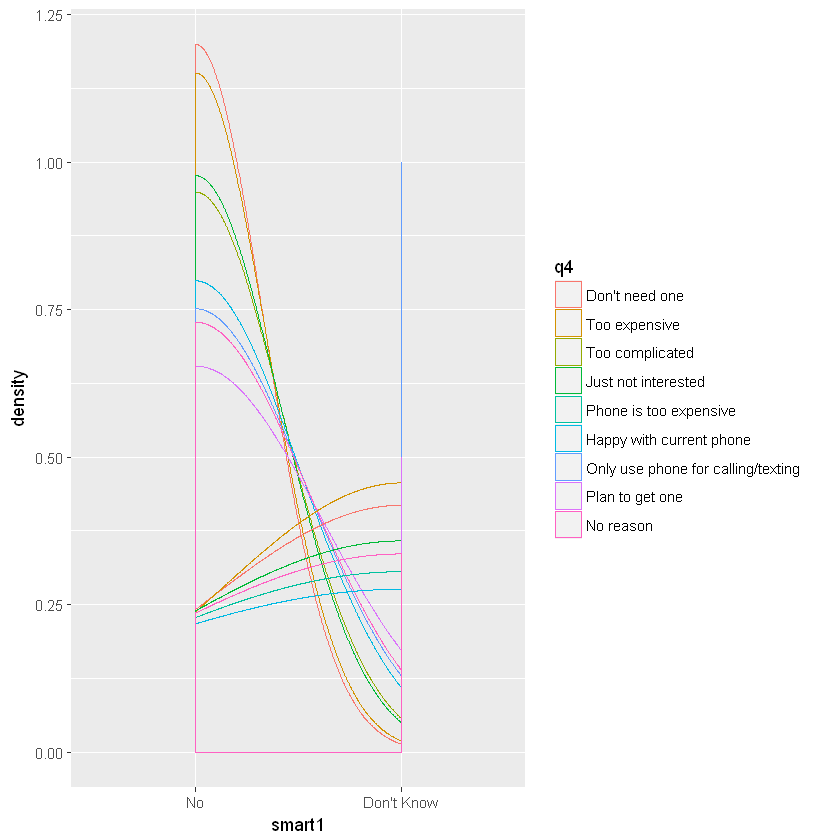

In [43]:
ggplot(n4,aes(smart1,colour=q4))+geom_density()

By removing the rows in which a user has a smartphone, we are left with the non-smart phone users and their reasons. 
The same are plotted using geom_density() graph as above.

Query 5: How many users that sucscribed for high speed broadband at home feel that lack of internet/ high-speed connection is a major disadvantage when it comes to learning about or accessing government services.

In [44]:
data1 <- data1[data1$bbhome1!="1" & data1$bbhome1!="4" & data1$bbhome1!="5" & data1$bbhome1!="8" & data1$bbhome1!="9", ]
data1 <- within(data1, bbhome1 <- factor(bbhome1, labels = c("Higher-speed","Both Dialup and Broadband")))

In [45]:
data1 <- within(data1, bbhome3c <- factor(bbhome3c, labels = c("Major Disadvantage","Minor Disadvantage","Not a disadvantage","Don't Know","Refused")))

In [46]:
n5 <- data1[!(is.na(data1$bbhome1) | data1$bbhome1==""), ]

In [47]:
data1 <- data1[data1$home4nw!="2" & data1$home4nw!="8" & data1$home4nw!="9",]

In [48]:
data1 <- within(data1, home4nw <- factor(home4nw, labels=c("Yes")))

In [49]:
n5 <- data1[!(is.na(data1$bbhome1) | data1$bbhome1==""), ]
n5 <- data1[!(is.na(data1$home4nw) | data1$home4nw==""), ]

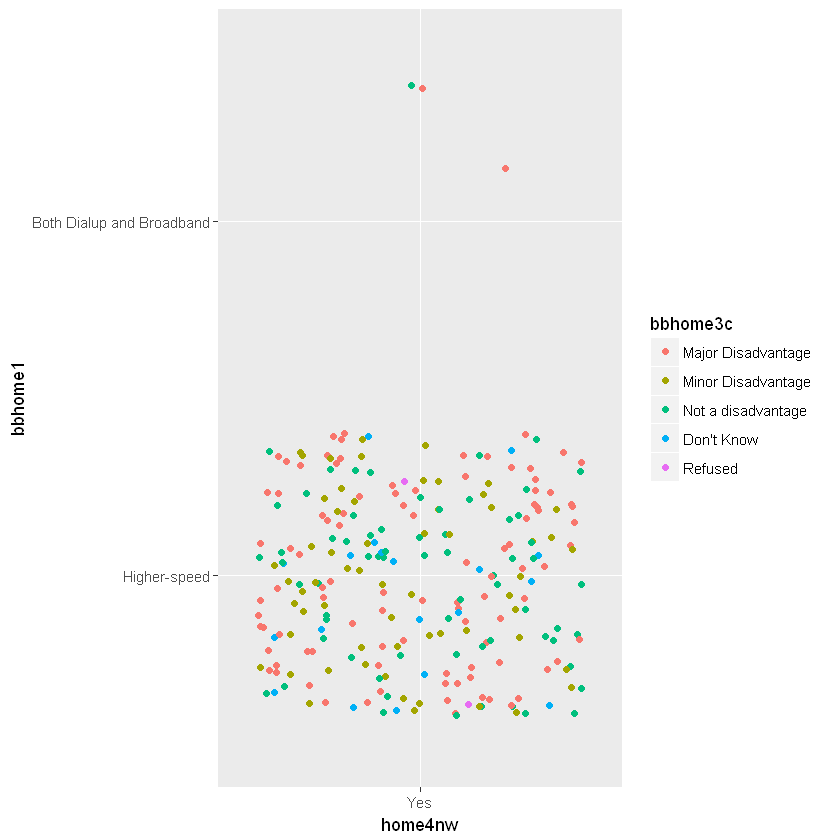

In [50]:
qplot(home4nw, bbhome1, colour=bbhome3c, data=n5, geom="jitter")

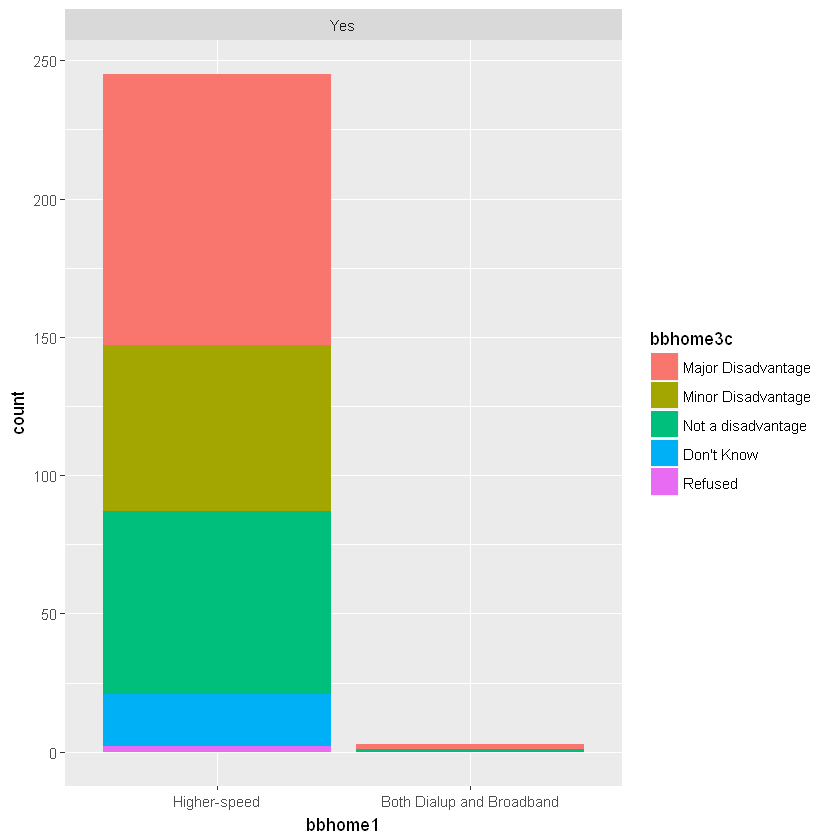

In [51]:
qplot(bbhome1, data=n5, geom="bar", facets = . ~ home4nw, fill=bbhome3c)

The above bar graph shows the number of users that have high speed connection and their varied opinion on whether lack of the same is a major disadvantage for accessing government services.

Query 6: Based on the type of corporation an employed user works at and their role, how will their opinion on whether thier job exists in 50 years differ?

In [52]:
data1 <- data1[data1$emptype1!="7" & data1$emptype1!="8" & data1$emptype1!="98" & data1$emptype1!="99", ]
data1 <- within(data1, emptype1 <- factor(emptype1, labels = c("Large corporation","Medium-sized company","Small business","Federal/state govt","school","Non-profit organisation")))

In [53]:
data1 <- data1[data1$emptype3!="6" & data1$emptype3!="8" & data1$emptype3!="9", ]
data1 <- within(data1, emptype3 <- factor(emptype3, labels = c("Professional","Manager","Govt official","Administrative","Customer service")))

In [54]:
data1 <- data1[data1$auto2!="8" & data1$auto2!="9", ]
data1 <- within(data1, auto2 <- factor(auto2, labels = c("Definitely will exist","Probably will exist","Probably will not exist","Definitely will not exist")))

In [55]:
library("dplyr")

In [56]:
n6 <- data1[!(is.na(data1$emptype1) | data1$emptype1==""), ]
n6 <- data1[!(is.na(data1$emptype3) | data1$emptype3==""), ]

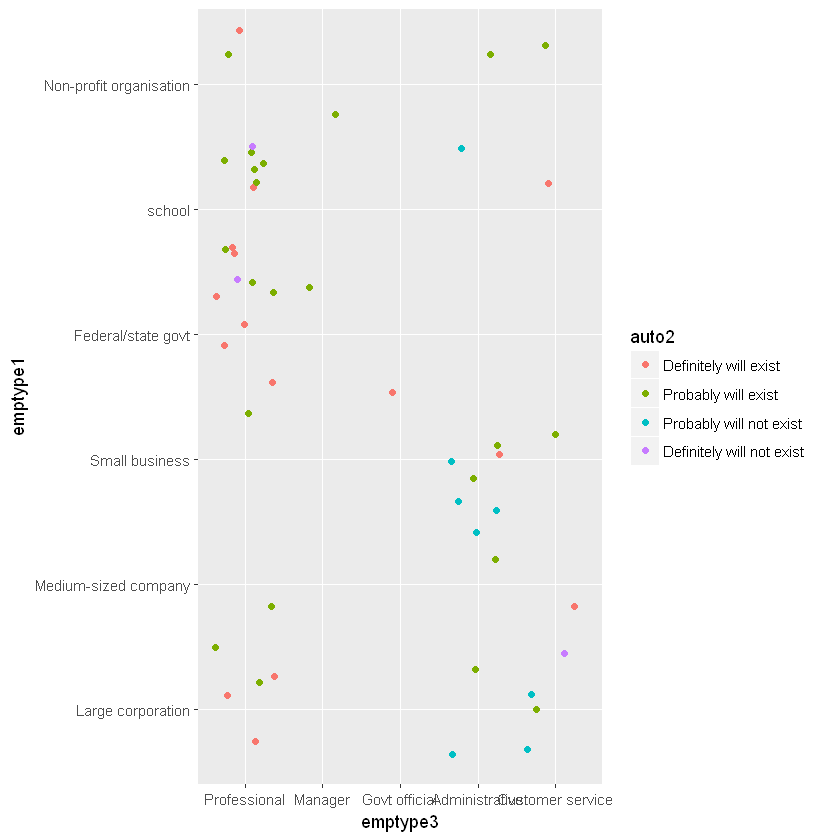

In [57]:
qplot(emptype3, emptype1, colour=auto2, data=n6, geom="jitter", width=1.0, height=0.5)

A jitter plot that answers the query 6 is presented above.

Query 7: Based on the age and gender of the users surveyed, how many people opine that online dating is a dangerous way to meet new people?

In [58]:
data1 <- data1[data1$age!="97" & data1$age!="98" & data1$age!="99", ]
data1 <- within(data1, sex <- factor(sex, labels = c("Male","Female")))
date4f <- data1[data1$date4f!="9",]
data1 <- within(data1, date4f <- factor(date4f, labels = c("Agree","Disagree","Don't Know")))

In [59]:
n7 <- data1[!(is.na(data1$age) | data1$age==""), ]
n7 <- data1[!(is.na(data1$sex) | data1$sex==""), ]

Warning message:
"position_stack requires non-overlapping x intervals"

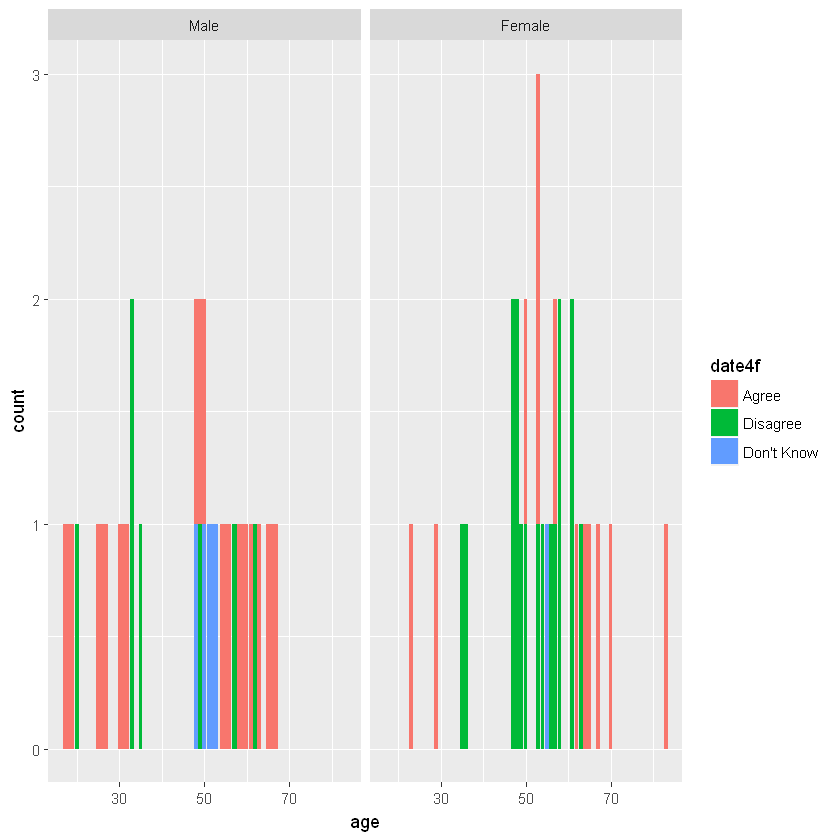

In [60]:
qplot(age, data=n7, geom="bar", facets = . ~ sex, fill=date4f)

The above bar graph shows the count of the number of people in each age group and gender thir opinion on whether online dating is a dangerous way to meet people or not.